![](itd.png)

    
# Análisis de Datos Masivos
## Clasificación del árbol de decisiones

## Nombre del docente
### José Gabriel Rodriguez Rivas
## Nombre del alumno
### Calos Alberto Carrete Gómez

### Parte 1: Crear un clasificador de árbol de decisiones
En esta práctica de laboratorio creará un clasificador de árbol de decisiones que captará información de un conjunto de datos rotulado.

El conjunto de datos contiene los nombres y los datos demográficos de todos los pasajeros. Además, se incluyen los detalles de viaje de los pasajeros. De estos datos, podemos crear un árbol de decisiones que ilustre los factores que contribuyeron a la supervivencia, o a la falta de ella, en el viaje.


![](table.png)


**Pregunta: Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?**
    
**Respuesta**: Se pueden realizar una gran cantidad de preguntas según la información tales como,¿Qué porcentaje de pasajeros sobrevivion?, ¿Cuanntos pasajeros había en total por cada clase?, ¿Cómo era la distribución hombre-mujer de los pasajeros?, ¿El rango de edad con más tendencia en los pasajeros?, ¿Cuántos pasajeros tenian hermanos?, ¿Cúantos pasajeros iban acompañados por sus hijos o sus padres?, entre otras.


#### Paso 1: Crear la estructura de datos
a) Importe pandas y el archivo csv

Primero, importe pandas y cree una estructura de datos del conjunto de datos de entrenamiento del Titanic, que se encuentra en el archivo titanic-train.csv.titanic-train.csv. Siga el método pd.read_csv().


In [1]:
import pandas as pd

training = pd.read_csv("titanic-train.csv")

In [2]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


#### Paso 2: Preparar los datos para el modelo de árbol de decisiones
a) Reemplace los datos de la cadena por etiquetas numéricas

Utilizaremos scikit-learn para crear árboles de decisiones. El modelo del árbol de decisiones que utilizaremos solo puede administrar datos numéricos. Los valores para la variable Gender (Género) se deben transformarse en representaciones numéricas. 0 se utilizará para representar el valor "masculino" y 1 para el valor "femenino".

In [3]:
training.head() #Se verifican los primeros 5 datos

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [4]:
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)


#### b) Verifique que la variable Gender haya cambiado.

El resultado debe mostrar valores de 0 o 1 para la variable Gender en el conjunto de datos.


In [5]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


#### C) Aborde la ausencia de valores en el conjunto de datos

El resultado del método info() que mencionamos más arriba indicó que aproximadamente 180 observaciones no tienen el valor de la edad. El valor de la edad es importante para nuestro análisis. Debemos abordar estos valores faltantes de alguna manera. Si bien no es lo ideal, podemos reemplazar estos valores de edad faltantes por el promedio de edad para todo el conjunto de datos.

In [6]:
training["Age"].fillna(training["Age"].mean(), inplace=True)

#### d) Verifique que se hayan reemplazado los valores.

In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    int64  
 5   Age          915 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


In [8]:
training["Age"].mean()

29.970867208672033

**Pregunta: ¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?**

**Respuesta**: 29.97086


#### Paso 3: Entrenar y calificar el modelo del árbol de decisiones.

a) Cree un objeto de arreglo con la variable que será el objetivo del modelo.

El propósito del modelo es clasificar a los pasajeros como sobrevivientes o víctimas fatales. El conjunto de datos identifica sobrevivientes y víctimas fatales. El modelo deducirá qué valores variables de entrada tienen más probabilidad de pertenecer a las víctimas fatales y a los sobrevivientes. Luego, usted podrá utilizar dicha información para clasificar pasajeros de un conjunto de datos único de prueba.

In [9]:
#crear la matriz para los valores objetivo
y_target = training["Survived"].values

b) Cree el arreglo de valores que será la entrada para el modelo.

Solo algunas de las funciones de datos son útiles para crear el árbol clasificador. Creamos una lista de las columnas a partir de los datos que deseamos que el clasificador utilice como variables de entrada y luego creamos un arreglo con el nombre de la columna de esa variable. La variable X_input contiene los valores para todas las funciones que utilizará el modelo para deducir cómo hacer las clasificaciones.

In [10]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#crear la variable para contener las características que usará el clasificador
X_input = training[list(columns)].values


c) Crear el modelo programado.

Importe el módulo del árbol de decisiones desde la biblioteca de aprendizaje automático sklearn. Cree el objeto clasificador clf_train. A continuación, utilice el método fit() del objeto clasificador con la variables X_input e y_target como parámetros para entrenar el modelo.


In [11]:
# importa el módulo de árbol de la biblioteca sklearn
from sklearn import tree
#create clf_train como un objeto clasificador de árbol de decisión
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#entrena el modelo utilizando el método fit () del objeto del árbol de decisión.
#Suministra el método con la variable de entrada X_input y la variable de destino y_target
clf_train = clf_train.fit(X_input, y_target)


d) Evalúe el modelo.

Utilice el método score() del objeto del árbol de decisiones para mostrar la precisión del porcentaje de las asignaciones realizadas por el clasificador. Este método considera las variables de entrada y salida como argumentos.


In [12]:
clf_train.score(X_input,y_target)

0.8163934426229508

#### Paso 6: Visualizar el árbol

a) Cree el resultado del archivo intermedio.

Importe el módulo sklearn.externals.six StringIO que se utiliza para generar las características del árbol de decisiones en un archivo. Crearemos un archivo dot de Graphviz que nos permitirá exportar los resultados del clasificador en un formato que se puede convertir en gráfico.

In [13]:
clasificacion = ['NO SOBREVIVE','SOBREVIVE']

In [14]:
from sklearn.externals.six import StringIO
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns,class_names=clasificacion)


b) Instale Graphviz.

Para visualizar el árbol de decisiones, Graphviz debe instalarse desde una terminal. La instalación requiere responder una pregunta emergente, lo cual no se puede hacer desde una celda de código de una libreta de anotaciones. Utilice el comando apt-get install graphviz de la línea de comando de la terminal para instalar este software.

c) Convierta el archivo intermedio en gráfico.

El archivo dot que se creó anteriormente se puede convertir en un archivo .png con el procesador dot de Graphiz. Este es un comando shell, así que utilice ! antes de él para ejecutarlo desde esta libreta de anotaciones. El nuevo archivo de imagen titanic.png deberá aparecer en el directorio que contiene esta libreta de anotaciones.

D) Muestre la imagen.

Ahora importaremos el módulo Image desde la biblioteca IPython.display. Esto permitirá que abramos y visualicemos un archivo gráfico externo en la página de la libreta de anotaciones. La función Image se utiliza para visualizar el archivo, con el del archivo .png como argumento.



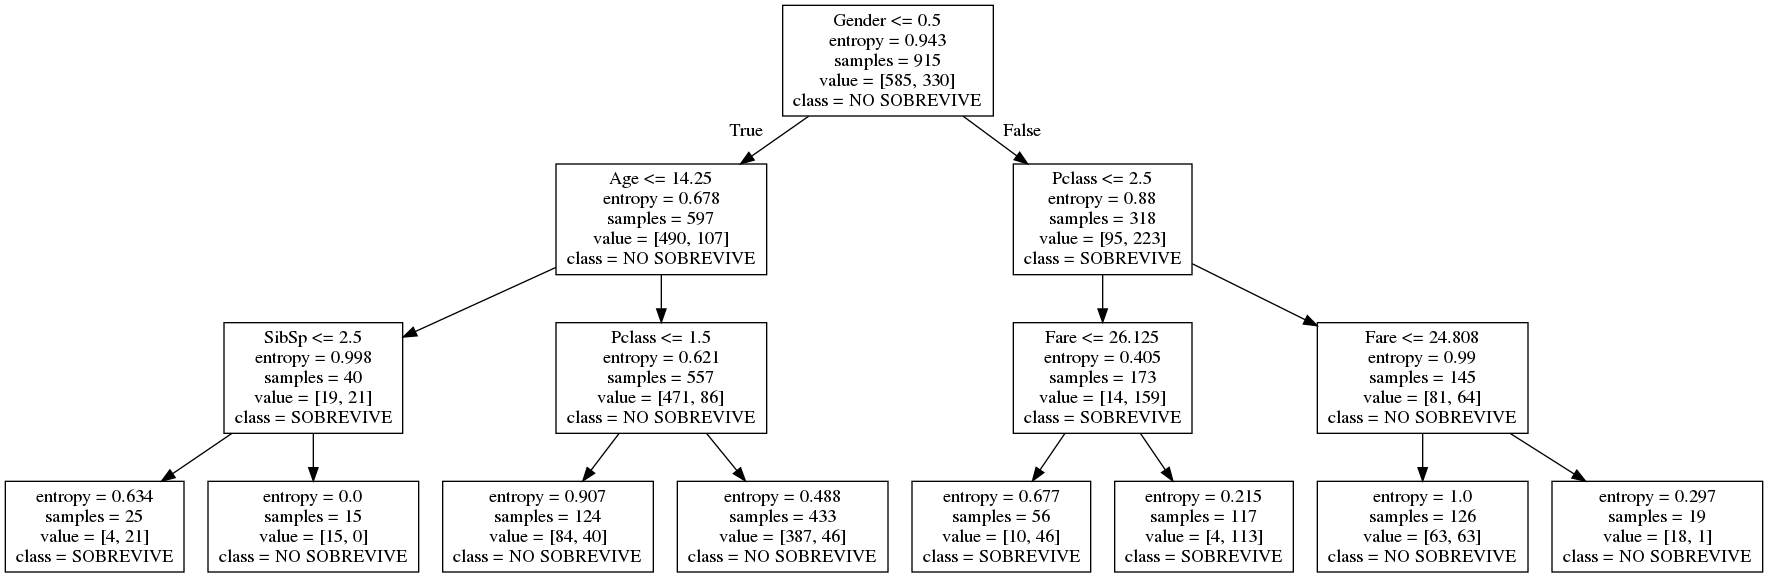

In [15]:
# Importar el módulo de imagen desde la biblioteca Ipython.display
from IPython.display import Image
# muestra el gráfico del árbol de decisión
Image("titanic.png")

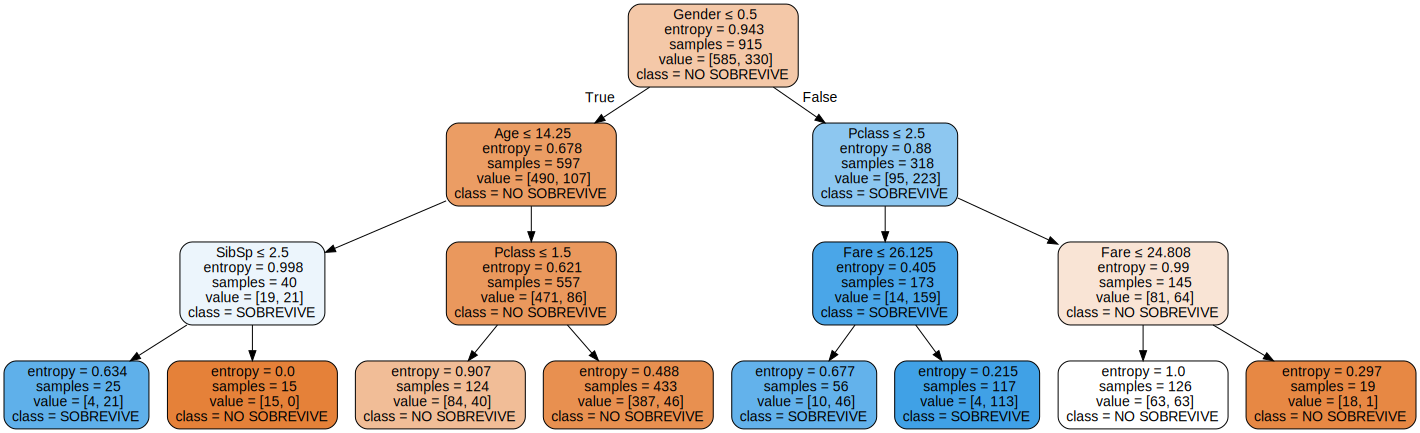

In [16]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None, class_names=clasificacion, feature_names=columns,
                               filled=True,rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("TITANICCOLOR",format='png')
graph

e) Interprete el árbol.

En el árbol entrenado, podemos ver varias cosas. Primero, en su raíz, está la variable Gender, que indica que es el único factor más importante al realizar la clasificación

**Pregunta: ¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?**


**Respuesta**:La división de la rama izquierda es en donde se encuentra el mayor número de victimas fatales, mientras que en la rama derecha es en donde podemos encontrar la mayor cantidad de sobreviviente.

### Parte 2: Aplicar el modelo del árbol de decisiones


#### Paso 1: Importar y elaborar los datos
a) Importe los datos.

In [17]:
testing = pd.read_csv("titanic-test.csv")


In [18]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


In [19]:
len(testing)

393

**Pregunta: ¿Cuántos registros hay en el conjunto de datos?**

**Respuesta**: 393

**Pregunta: ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?**

**Respuesta**: La variable Age la cual faltan 86 y la variable Cabin la cual faltan 93 valores


b) Utilice una expresión lambda para reemplazar los valores “male” y “female” por 0 para masculino y 1 para femenino.


In [20]:
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)


c) Reemplace los valores de edad faltantes por el promedio de las edades.


In [21]:
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

d) Verifique que se hayan reemplazado los valores.

In [22]:
testing["Gender"].head(5) #Solo se observan los primeros 5 valores de Gender y se puede observar que son 0 y 1

0    0
1    1
2    0
3    1
4    1
Name: Gender, dtype: int64

#### Paso 2: Etiquetar el conjunto de datos de prueba
a) Cree un arreglo de variables de entrada a partir del conjunto de datos de prueba.

In [23]:
X_input = testing[list(columns)].values

b) Aplique el modelo al conjunto de datos de prueba.

In [24]:
target_labels = clf_train.predict(X_input)
#convierte la matriz de destino en un marco de datos de pandas utilizando el método pd.DataFrame () y el objetivo como argumento
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})


c) Evalúe la precisión de las etiquetas estimadas

In [25]:
# Importa la biblioteca numpy como np
import numpy as np
# Cargar datos para todos los pasajeros en la variable all_data
all_data = pd.read_csv("titanic_all.csv")
# Fusiona usando el campo Nombre como clave, selecciona solo las filas de los dos conjuntos de datos que se refieren al mismo pasajero
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])
# Calcula la precisión como una relación de observaciones coincidentes con las oscilaciones totales. Almacene esto en la variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
acc

0.7588832487309645

### Parte 3: Evaluar el modelo del árbol de decisiones

La biblioteca de sklearn incluye un módulo que se puede utilizar para evaluar la precisión del modelo del árbol de decisiones. El método train_test_split() particionará las observaciones del conjunto de datos completo en dos arreglos de observaciones seleccionados de forma aleatoria que conforman los conjuntos de datos de prueba y entrenamiento. Después de ajustar el modelo según los datos de entrenamiento, se podrá calificar el módulo entrenado y se podrá comparar la precisión de predicción tanto para los conjuntos de datos de entrenamiento como para los de prueba. Es recomendable que los dos puntajes sean cercanos, pero la precisión para el conjunto de datos de prueba es, generalmente, más baja que para el conjunto de datos de entrenamiento.


#### Paso 1: Importar los datos

Esta vez, importaremos los datos desde una archivo csv, pero especificaremos las columnas que deseamos que aparezcan en la estructura de datos. Haremos esto pasando por una lista de nombres de columnas similar a un arreglo hasta el parámetro usecols del método read_csv(). Utilice las siguientes columnas: "Survived", "Fare", "Pclass", "Gender", "Age" y "SibSP". Cada una debe estar entre comillas y la lista debe estar entre corchetes. Coloque el nombre all_data a esta estructura de datos.


In [26]:
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])

In [27]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,0,1,female,2.0000,1,151.5500
3,0,1,male,30.0000,1,151.5500
4,0,1,female,25.0000,1,151.5500


In [28]:
len(all_data)

1308

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


**Pregunta: ¿Cuántos registros hay en el conjunto de datos?**

**Respuesta**:1308

**Pregunta: ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?**

**Respuesta**: La variable Age la cual faltan 263 valores

#### Paso 2: Explicar los datos.

a) Elimine las cadenas "male" y "female" y reemplácelas por 0 y 1 respectivamente.

In [30]:
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [31]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500



c) Reemplace los valores de edad faltantes por el promedio de edad de todos los miembros del conjunto de datos.


In [32]:
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

#### Paso 2: Crear las variables de entradas y salida para el conjunto de datos de entrenamiento y prueba

La biblioteca sklearn incluye módulos que ayudan con la selección del modelo. Importaremos desde sklearn.model_selection el método train_test_split()
a) Designe las variables de entrada y las variables de salida y genere arreglos.

In [33]:
# Importa train_test_split () de la biblioteca sklearn.model_selection
from sklearn.model_selection import train_test_split
#crea las variables de entrada y de destino como X mayúscula y minúscula y. Reutilice la variable de columnas.
X = all_data[list(columns)].values
y = all_data["Survived"].values
#genera las cuatro matrices de datos de prueba y capacitación con el método train_test_split ()
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [34]:
type(X_train)

numpy.ndarray


b) Entrene el modelo y adáptelo a los datos de prueba.

Ahora el modelo se puede adaptar nuevamente. El modelo se entrenará solo con los datos de entrenamiento, según seleccionó la función train_test_split.


In [35]:
#crea el objeto del árbol de decisiones de entrenamiento
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#fitea/entrena el modelo de entrenamiento usando las variables de entrada y objetivo
clf_train = clf_train.fit(X_train, y_train)


c) Compare modelos mediante la calificación de cada uno de ellos.

Siga el método score() de cada objeto del árbol de decisiones para generar puntajes.


In [36]:
# puntúa el modelo en los dos conjuntos de datos y almacene los puntajes en variables. Convierta los puntajes a cadenas usando str ()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))
#output de los valores en una cadena de prueba
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816
